<a href="https://colab.research.google.com/github/nagxsan/machine-learning/blob/main/toy-ml-project/toy_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toy ML project
A very simple ML project that determines if a student has been placed or not given the CGPA and the IQ. It is a simple classification problem and this project is just to get an end-to-end feel of the workflow

### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

### Read the csv data into a pandas dataframe

In [14]:
df = pd.read_csv('./placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


### Steps

0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

### Preprocessing

In [16]:
df = df.iloc[:, 1:] # To remove the first unnecessary column

In [17]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


### EDA

In [18]:
import matplotlib.pyplot as plt

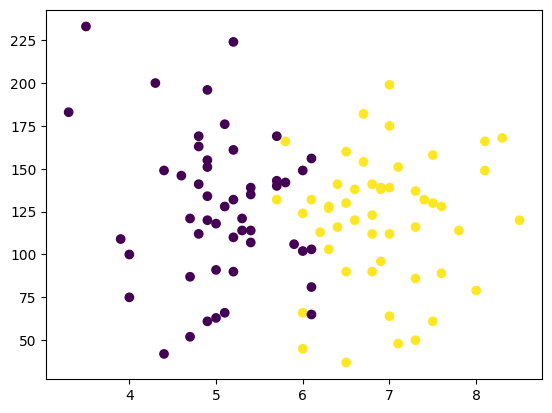

In [20]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

### Extract input and output columns

In [22]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [24]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [25]:
y.head()

,placement
0,1
1,0
2,0
3,1
4,0


### Train test split

In [26]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train model

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
clf = LogisticRegression()

In [37]:
# Training step
clf.fit(X_train, y_train)

LogisticRegression()

### Evaluate the model

In [38]:
y_pred = clf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, y_pred)

0.9

In [41]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

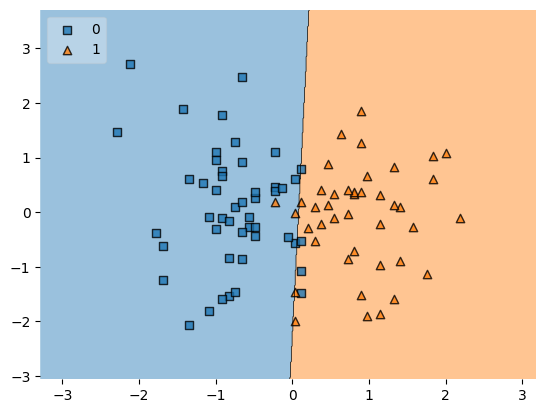

In [42]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

### Deploy the model

In [44]:
import pickle # converts Python object to file

In [45]:
pickle.dump(clf, open('model.pkl', 'wb'))